In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x_data = np.array([8759, 10132, 12078, 16430])
y_data = np.array([487, 612, 866, 1030])

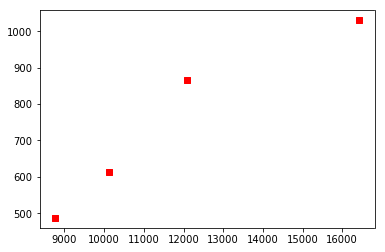

In [3]:
plt.scatter(x_data, y_data, color="r", marker = "s")
plt.show()

In [4]:
weight_0 = np.random.sample(5)
weight_1 = np.random.sample(5)

In [10]:
y_hat_list = []
for w0, w1 in zip(weight_0, weight_1):
    y_hat_list.append(w0+w1*x_data)

In [13]:
y_hat_list

[array([ 747.09333174,  864.12340374, 1029.99413943, 1400.94452059]),
 array([ 7708.34407261,  8916.61215   , 10629.13194504, 14458.98094197]),
 array([ 5628.07002501,  6510.26331732,  7760.62613366, 10556.91543309]),
 array([ 7778.66664889,  8997.88478819, 10725.92448161, 14590.48190492]),
 array([ 8057.85399352,  9320.81705889, 11110.85793668, 15114.07371271])]

In [16]:
plt.scatter(x_data, y_data, color="r", marker="s")
for y_hat in y_hat_list:
    plt.plot(x_data, y_hat)
    

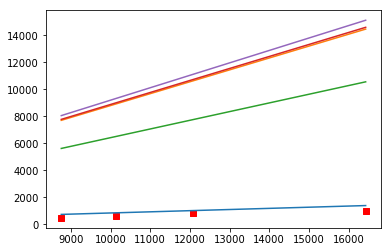

In [17]:
plt.show()

## Linear Regression Implementation with Numpy

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv("data/slr06.csv")

In [24]:
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [47]:
raw_X = df["X"].values.reshape(-1, 1) # 2-dim

In [46]:
y = df["Y"].values # 1-dim

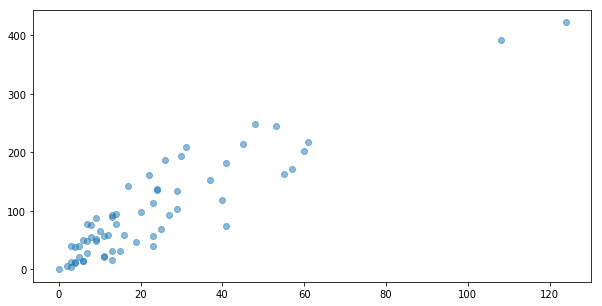

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(raw_X, y, 'o', alpha=0.5)

In [48]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]), array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [50]:
#앞에 세타 제로 항 붙이는 것. 
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis=1)

In [52]:
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [53]:
w= np.random.normal((2, 1))

In [54]:
w

array([3.26532226, 1.01946616])

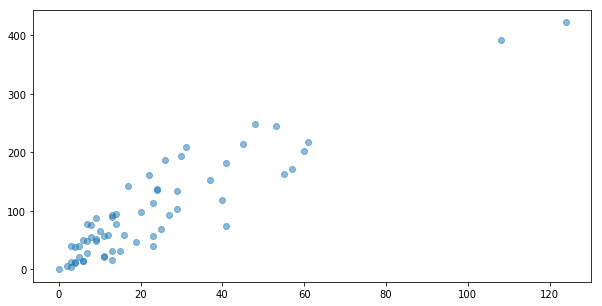

In [57]:
plt.figure(figsize=(10, 5))
#plotting하는데 x0하면 안되지
plt.plot(raw_X, y, 'o', alpha=0.5)

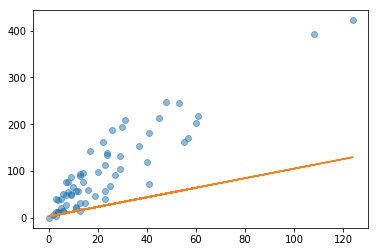

In [59]:
y_predict = np.dot(X, w)  # hypothesis
plt.plot(raw_X, y, "o", alpha = 0.5)
plt.plot(raw_X, y_predict)

In [60]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [62]:
hypothesis_function(X, w)[:5]

array([113.36766745,  22.63517929,  16.51838233, 129.67912599,
        44.04396863])

In [67]:
def cost_function(h, y):
    return (1/(2*len(y)) * np.sum((h-y)**2))

In [68]:
h = hypothesis_function(X, w)
cost_function(h, y)

4724.914888319487

In [73]:
X[:, 1]

array([108.,  19.,  13., 124.,  40.,  57.,  23.,  14.,  45.,  10.,   5.,
        48.,  11.,  23.,   7.,   2.,  24.,   6.,   3.,  23.,   6.,   9.,
         9.,   3.,  29.,   7.,   4.,  20.,   7.,   4.,   0.,  25.,   6.,
         5.,  22.,  11.,  61.,  12.,   4.,  16.,  13.,  60.,  41.,  37.,
        55.,  41.,  11.,  27.,   8.,   3.,  17.,  13.,  13.,  15.,   8.,
        29.,  30.,  24.,   9.,  31.,  14.,  53.,  26.])

In [140]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

In [141]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.88824041  3.41611765]
cost: 625.3738186969008


In [144]:
theta_list = np.array(theta_list)

In [145]:
theta_list.shape

(1001, 2)

In [136]:
plt.figure(figsize=(10, 5))

In [152]:
y_predict_step = np.dot(X, theta_list.transpose())

In [153]:
y_predict_step.shape

(63, 1001)

In [158]:
y_predict_step[:, i]

array([[113.36766745, 429.26091841, 410.76792637, ..., 388.8310366 ,
        388.83031242, 388.82959188],
       [ 22.63517929,  78.26797205,  75.08078627, ...,  84.79355034,
         84.79387098,  84.79419   ],
       [ 16.51838233,  54.60552623,  52.45019255, ...,  64.29664115,
         64.29703223,  64.29742133]])

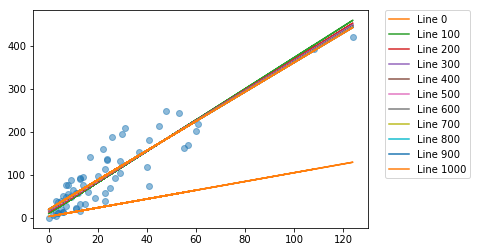

In [163]:
plt.plot(raw_X, y, "o", alpha=0.5)
for i in range(0, len(cost_list), 100):# 100개마다
    plt.plot(raw_X, y_predict_step[:, i], label="Line %d"%i)
    

plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Multivariaate Linear Regression

In [164]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

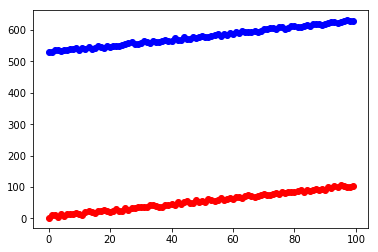

In [167]:
# 데이터 직접 만들어 주는 것. 
# parameter: 데이터 갯수, 절편의 값, 분산

def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = random.uniform(0, 1) * variance + i
        x[i][1] = random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + random.uniform(0, 1) * variance + 500
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = gen_data(100, 25, 10)

plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [168]:
# X -> 100*3
# Y -> 100*1

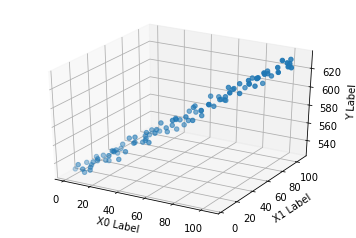

In [171]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x[:,0], x[:,1], y)

ax.set_xlabel("X0 Label")
ax.set_ylabel("X1 Label")
ax.set_zlabel("Y Label")

In [172]:
def compute_cost(x, y, theta):
    #Compute cost for linear Regression
    m = y.size
    predictions = x.dot(theta)
    sqErrors = (predictions-y)
    J = (1.0/(2*m))*sqErrors.T.dot(sqErrors)
    return J

In [187]:
def minimize_gradient(x, y, theta, iterations=100000, alpha=0.01):
    
    m = y.size
    cost_history = []
    theta_history = []
    
    for _ in range(iterations):        
        predictions = x.dot(theta)
        
        for i in range(theta.size):
            partial_marginal = x[:, i]
            errors_xi = (predictions - y) * partial_marginal
            theta[i] = theta[i] - alpha * (1.0 / m) * errors_xi.sum()
        
        if _ % 1000 == 0:
            theta_history.append(theta)
            cost_history.append(compute_cost(x, y, theta))

    return theta, np.array(cost_history), np.array(theta_history)

In [188]:
theta_initial = np.ones(3)

theta, cost_history, theta_history = minimize_gradient(
        x, y,theta_initial, 300000, 0.0001)
print("theta", theta)


theta [4.81304220e-01 5.33778159e-01 5.23957270e+02]


In [189]:
from sklearn import  linear_model

regr = linear_model.LinearRegression()
regr.fit(x[:,:2], y)

# # The coefficients
print('Coefficients: ', regr.coef_)
print('intercept: ', regr.intercept_)

Coefficients:  [0.47970013 0.52524271]
intercept:  524.6673372691821


In [190]:
print(np.dot(theta, x[10]))
print(regr.predict(x[10, :2].reshape(1, 2)))

535.9417407070217
[536.53483448]


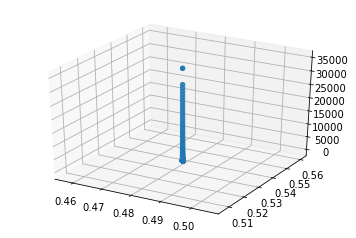

In [191]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(theta_history[:,0],theta_history[:,1], cost_history, zdir="z")


plt.show()

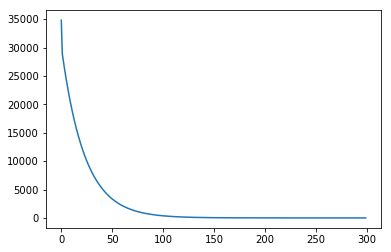

In [192]:
plt.plot(cost_history)
plt.show()

## Performance Measure for a Regression Model

### MAE -> 잔차의 절대값 Sum

In [193]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

## RMSE -> 잔차 제곱의 합의 루트

In [195]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mean_squared_error(y_true, y_pred)
#scikit-learn에는 이게 없어서 여기까지 하고 제곱 씌우면 됨

0.375

### R-Squared

In [197]:
from sklearn.metrics import r2_score 
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

r2_score(y_true, y_pred )

0.9486081370449679

### Divide Data into Training Data and Test Data
Overfitting 막을 수 있음.

In [200]:
import numpy as np 
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)).range(5)

X_train, X_test, y_train, y_test = train-test_split(X, y, test_size = 0.33, random_state =42)

AttributeError: 'numpy.ndarray' object has no attribute 'range'

## Linear Regression with Scikit-Learn

In [201]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as plt

In [210]:
boston = load_boston()

x_data = boston.data
y_data = boston.target.reshape(boston.target.size, 1)
# y data 2 dim으로 들어가야 함

In [204]:
x_data[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [207]:
boston.feature_names
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [208]:
x_data.shape

(506, 13)

In [209]:
from sklearn import preprocessing

In [214]:
minmax_scale = preprocessing.MinMaxScaler().fit(x_data)
#minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 5)).fit(x_data)
#이렇게 feature_range넣으면 0에서 5사이의 값들로 나옴. 
x_scaled_data  = minmax_scale.transform(x_data)
x_scaled_data[:3]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 9.89737254e-01,
        6.34657837e-02]])

In [215]:
#standard_scale = preprocessing.StandardScaler().fit(x_data)
#Standard_scaler를 써도 됨

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled_data, y_data, test_size = 0.33)

In [217]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((339, 13), (167, 13), (339, 1), (167, 1))

In [223]:
from sklearn import linear_model

regr = linear_model.LinearRegression(fit_intercept=True,
                                    normalize=False, 
                                    copy_X= True, 
                                    n_jobs=1)

#fit_intercept = 절편 넣을지 안넣을지, 
#copy_X -> X의 값을 복사한다음에 Regression 돌리겠다. 
# n_jobs = 몇개의 cpu쓸건가, 1하고 데이터 너무 크면 한 4개 8개 정도 넣으면 됨 

In [224]:
regr.fit(X_train, y_train)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [225]:
print("Coefficients:", regr.coef_)
print("intercept:", regr.intercept_)

Coefficients: [[-10.05253696   5.02973892   1.0862184    2.94298403  -9.19829237
   18.63140305  -0.13549745 -17.04614409   8.59468496  -7.70947605
   -9.19674824   3.04954298 -19.68478491]]
intercept: [28.42489887]


In [230]:
x_data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [228]:
x_data[0].reshape(1, -1)

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [231]:
regr.predict(x_data[0].reshape(1, -1))
#predict는 2dim이 들어와야 됨. 

array([[-1141.3816296]])

In [233]:
#위 predict랑 이거랑 똑같은 것. 
x_data[0].dot(regr.coef_.T)+ regr.intercept_

array([-1141.3816296])

In [235]:

regr.predict(x_data[:5])#얘는 그자체로 2dim

array([[-1141.3816296 ],
       [ -925.97375963],
       [ -821.14970108],
       [ -665.03666309],
       [ -703.89166304]])

In [236]:
x_data[:5].dot(regr.coef_.T)+regr.intercept_

array([[-1141.3816296 ],
       [ -925.97375963],
       [ -821.14970108],
       [ -665.03666309],
       [ -703.89166304]])

#### Metric 측정

In [237]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [240]:
y_true = y_test
y_hat = regr.predict(X_test)

In [241]:
r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

(0.7938584191665952, 3.0182441400357765, 16.097811361714573)

이정도면 매우 잘 나온 모델임